In [1]:
#28-11-2021

In [2]:
#Data analysis
import pandas as pd
import numpy as np
import tensorflow
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats

In [3]:
data = pd.read_csv("pba.tsv", encoding="latin1")
data = data.fillna(method="ffill")
data.tail()

,Word\tTag
1015123,1945\tO
1015124,",\tO"
1015125,dia\tO
1015126,",\tO"
1015127,yang\tO


In [4]:
data.head()

,Word\tTag
0,Ia\tO
1,menjabat\tO
2,sebagai\tO
3,Presiden\tO
4,ketiga\tO


In [5]:
data = pd.read_csv("pba.tsv", sep='\t')
data = data.fillna(method="ffill")
data.tail()

,Word,Tag
1048570,1945,O
1048571,",",O
1048572,dia,O
1048573,",",O
1048574,yang,O


In [6]:
data.head(10)

,Word,Tag
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O
5,Mesir,Place
6,pada,O
7,periode,O
8,15,O
9,Oktober,O


In [7]:
data['Tag'].value_counts()

O               951730
Place            59647
Person           27992
Organisation      9206
Name: Tag, dtype: int64

In [8]:
data.shape

(1048575, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Word    1048575 non-null  object
 1   Tag     1048575 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


In [10]:
#so we are basically having only those rows where sentence column is not null
df = data[data['Word'].notnull()]

In [11]:
data['Tag'].value_counts()

O               951730
Place            59647
Person           27992
Organisation      9206
Name: Tag, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Word    1048575 non-null  object
 1   Tag     1048575 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Word    1048575 non-null  object
 1   Tag     1048575 non-null  object
dtypes: object(2)
memory usage: 24.0+ MB


In [14]:
# A class to retrieve the sentences from the dataset
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w) for w in zip(s["Word"].values.tolist())]
        self.grouped = self.data.groupby("Tag").apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try:
            s = selg.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [15]:
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

None


In [16]:
token = getter.sentences
print(len(token))

4


In [17]:
largest_sen = max(len(sen) for sen in token)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 951730 words


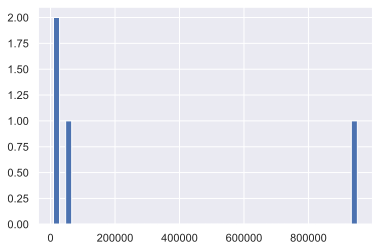

In [18]:
%matplotlib inline
plt.hist([len(sen) for sen in token], bins = 50)
plt.show()

In [19]:
data.head()

,Word,Tag
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [20]:
max_len = 50
X = [[w[0]for w in s] for s in token]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)
new_X[1]

['Universitas',
 'Indonesia',
 'Independen',
 'Universitas',
 'Gadjah',
 'Mada',
 'Universitas',
 'Indonesia',
 'Partai',
 'Komunis',
 'Indonesia',
 'PKI',
 'Majelis',
 'Permusyawaratan',
 'Rakyat',
 'PBB',
 'MPR',
 'Golkar',
 'Microsoft',
 'Microsoft',
 'Microsoft',
 'Arun',
 'Natural',
 'Gas',
 'Liquefaction',
 'ExxonMobil',
 'Dewan',
 'Perwakilan',
 'Rakyat',
 'Vereenigde',
 'Oostindische',
 'Compagnie',
 'Institut',
 'Teknologi',
 'Bandung',
 'Dewan',
 'Perwakilan',
 'Rakyat',
 'PKB',
 'Golkar',
 'PKB',
 'Golkar',
 'Golkar',
 'Partai',
 'Kebangkitan',
 'Bangsa',
 'Persiga',
 'Trenggalek',
 'Liga',
 'Indonesia']

In [21]:
new_X[2]

['Sadat',
 'Anwar',
 'Sadat',
 'Hafez',
 'Assad',
 'Anwar',
 'Sadat',
 'Saleha',
 'Chairil',
 'Anwar',
 'Rainer',
 'Maria',
 'Rilke',
 'Gamal',
 'Abdul',
 'Nasser',
 'Muhammad',
 'Naguib',
 'Gamal',
 'Abdul',
 'Nasser',
 'Gamal',
 'Abdul',
 'Nasser',
 'Gamal',
 'Abdul',
 'Nasser',
 'Goenawan',
 'Goenawan',
 'Goenawan',
 'Soeharto',
 'Goenawan',
 'Dwiki',
 'Dharmawan',
 'Anaximandros',
 'Anaximandros',
 'Isyana',
 'Hadiningrat',
 'Hadiningrat',
 'Dorodjatun',
 'Hamengkubuwana',
 'IX',
 'Dorodjatun',
 'Hamengkubuwana',
 'IX',
 'Hamengkubuwana',
 'VIII',
 'Hamengkubuwana',
 'IX',
 'Hamengkubuwana']

In [22]:
new_X[3]

['Mesir',
 'Mesir',
 'Mesir',
 'Kerajaan',
 'Kairo',
 'Mesir',
 'Britania',
 'Raya',
 'Mesir',
 'Israel',
 'Israel',
 'Terusan',
 'Mesir',
 'Mesir',
 'Gunung',
 'Agung',
 'Bali',
 'Bali',
 'Gunung',
 'Batur',
 'Gunung',
 'Agung',
 'Gunung',
 'Merbuk',
 'Patas',
 'Bali',
 'Bali',
 'Bali',
 'Selatan',
 'Bali',
 'Beratan',
 'Batur',
 'Seminyak',
 'Jimbaran',
 'Kabupaten',
 'Badung',
 'Lima',
 'Puluh',
 'Kota',
 'Sumatera',
 'Barat',
 'Belanda',
 'Mesir',
 'Mesir',
 'Mesir',
 'Mesir',
 'Perancis',
 'Inggris',
 'Israel',
 'Mesir']

In [23]:
words = set(list(data['Word'].values))
words.add('PADword')
n_words = len(words)
n_words

80068

In [24]:
tags = list(set(data["Tag"].values))
n_tags = len(tags)
n_tags

4

In [25]:
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}

In [26]:
print(words2index['Mesir'])
print(tags2index['Place'])

37309
1


In [27]:
data['Word_idx'] = data['Word'].map(words2index)
data['Tag_idx'] = data['Tag'].map(tags2index)
data.head()

,Word,Tag,Word_idx,Tag_idx
0,Ia,O,52677,0
1,menjabat,O,388,0
2,sebagai,O,78192,0
3,Presiden,O,66827,0
4,ketiga,O,46551,0


In [28]:
from sklearn.model_selection import train_test_split
X_tr, X_te = train_test_split(new_X, test_size=0.1, random_state=2021)

In [29]:
print(len(new_X))
print(len(X_tr))
print(len(X_te))

4
3
1


In [30]:
X_tr[0]

['Sadat',
 'Anwar',
 'Sadat',
 'Hafez',
 'Assad',
 'Anwar',
 'Sadat',
 'Saleha',
 'Chairil',
 'Anwar',
 'Rainer',
 'Maria',
 'Rilke',
 'Gamal',
 'Abdul',
 'Nasser',
 'Muhammad',
 'Naguib',
 'Gamal',
 'Abdul',
 'Nasser',
 'Gamal',
 'Abdul',
 'Nasser',
 'Gamal',
 'Abdul',
 'Nasser',
 'Goenawan',
 'Goenawan',
 'Goenawan',
 'Soeharto',
 'Goenawan',
 'Dwiki',
 'Dharmawan',
 'Anaximandros',
 'Anaximandros',
 'Isyana',
 'Hadiningrat',
 'Hadiningrat',
 'Dorodjatun',
 'Hamengkubuwana',
 'IX',
 'Dorodjatun',
 'Hamengkubuwana',
 'IX',
 'Hamengkubuwana',
 'VIII',
 'Hamengkubuwana',
 'IX',
 'Hamengkubuwana']

In [31]:
X_te[0]

['Mesir',
 'Mesir',
 'Mesir',
 'Kerajaan',
 'Kairo',
 'Mesir',
 'Britania',
 'Raya',
 'Mesir',
 'Israel',
 'Israel',
 'Terusan',
 'Mesir',
 'Mesir',
 'Gunung',
 'Agung',
 'Bali',
 'Bali',
 'Gunung',
 'Batur',
 'Gunung',
 'Agung',
 'Gunung',
 'Merbuk',
 'Patas',
 'Bali',
 'Bali',
 'Bali',
 'Selatan',
 'Bali',
 'Beratan',
 'Batur',
 'Seminyak',
 'Jimbaran',
 'Kabupaten',
 'Badung',
 'Lima',
 'Puluh',
 'Kota',
 'Sumatera',
 'Barat',
 'Belanda',
 'Mesir',
 'Mesir',
 'Mesir',
 'Mesir',
 'Perancis',
 'Inggris',
 'Israel',
 'Mesir']

In [32]:
new_X[0]

['Ia',
 'menjabat',
 'sebagai',
 'Presiden',
 'ketiga',
 'pada',
 'periode',
 '15',
 'Oktober',
 '1970',
 'hingga',
 'terbunuhnya',
 'pada',
 '6',
 'Oktober',
 '1981',
 '.',
 '.',
 'Oleh',
 'dunia',
 'Barat',
 'ia',
 'dianggap',
 'sebagai',
 'orang',
 'yang',
 'sangat',
 'berpengaruh',
 'di',
 'dan',
 'di',
 'Timur',
 'Tengah',
 'dalam',
 'sejarah',
 'modern',
 '.',
 '.',
 'dilahirkan',
 'di',
 'Mit',
 'Abu',
 'Al-Kum',
 ',',
 'Al-Minufiyah',
 ',',
 ',',
 'dalam',
 'sebuah',
 'keluarga']

In [33]:
!pip3 install tensorflow==1.15
!pip3 install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.7.0rc0, 2.7.0rc1, 2.7.0)
ERROR: No matching distribution found for tensorflow==1.15


ERROR: Could not find a version that satisfies the requirement tensorflow_text==1.15 (from versions: 2.4.0rc0, 2.4.0rc1, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.5.0, 2.6.0rc0, 2.6.0, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.3)
ERROR: No matching distribution found for tensorflow_text==1.15


In [34]:
import tensorflow as tf1
print(tf1.__version__)

2.7.0


In [35]:
pip install sklearn-crfsuite

Note: you may need to restart the kernel to use updated packages.
